# Initialize

In [1]:
%cd ".."
# %cd /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics

/local_data/teo_fs_fast/rtorre/cernbox/ML/TwoSampleTests/GitHub/GenerativeModelsMetrics


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/100D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-07-30 15:02:39.519117: Importing os...
2024-07-30 15:02:39.519426: Importing sys...
Visible devices: [0]
2024-07-30 15:02:39.519555: Importing timer from timeit...
2024-07-30 15:02:39.519589: Setting env variables for tf import (only device(s) [0] will be available)...
2024-07-30 15:02:39.519654: Importing numpy...
2024-07-30 15:02:39.580196: Importing matplotlib...
2024-07-30 15:02:39.745836: Importing h5py...
2024-07-30 15:02:39.757182: Importing importlib.util...
2024-07-30 15:02:39.757235: Importing json...
2024-07-30 15:02:39.757268: Importing pandas...
2024-07-30 15:02:39.925642: Importing random...
2024-07-30 15:02:39.925708: Importing scipy utils...
2024-07-30 15:02:40.090702: Importing subprocess...
2024-07-30 15:02:40.090805: Importing tensorflow...


Tensorflow version: 2.12.0
2024-07-30 15:02:41.320023: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-07-30 15:02:41.454475: Importing timeit...
2024-07-30 15:02:41.454540: Importing tqdm...
2024-07-30 15:02:41.456262: Importing typing...
2024-07-30 15:02:41.456330: Setting tf configs...
2024-07-30 15:02:41.496306: Importing GMetrics module...
2024-07-30 15:02:43.501548: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA L40S
Loaded 1 GPUs: ['NVIDIA L40S']
Model directory exists
2024-07-30 15:02:43.555301: All done.


# Model definition

In [3]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
dist_1 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
dist_2 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)
sample from dist_1:  tf.Tensor(
[[  1.91445107  -2.76153434  -3.43323223   7.64576955   0.40180012
   -1.54630583   5.40504032  -2.45371653  -6.6117742    0.10771743
   -2.4273847    7.60628533   5.01479685  -0.80459746  -0.86720562
   -3.75163826  -0.69391021  -5.33313732   5.26738688  -5.78498904
    1.12458017  -4.47940648  -0.4474242   -2.59568939  -2.44898263
    1.55035606  -1.85271676  -5.47760979  -5.4891624    1.92841313
    1.80298843   1.37451324  -5.50705267  -4.87041055  -0.72087521
   -5.10871132   4.48338344 -10.6507996   -2.19847207   6.38164433
   -1.68827092   1.54153519   5.89025258   2.0636

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 10_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [7]:
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100, # to be included in metric kwargs
                           seed_slicing = 0, # to be included in metric kwargs
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 20, # to be included in metric kwargs
                               num_points = 10, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4, # to be included in metric kwargs
                               block_size = 10_000, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,10000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,100000000,False,10


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetric",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100, # optimized for 5D
                                       "latex": "$t_{\mathrm{FGD}}$",
                                       "null_file": null_hypotheses_dir+"FGD.json"},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetric" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2, # optimized for 5D
                                       "latex": "$t_{\mathrm{MMD}}$",
                                       "null_file": null_hypotheses_dir+"MMD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$t_{\overline{\mathrm{KS}}}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mathrm{SKS}}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mathrm{SW}}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$t_{\mathrm{LLR}}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fgd': {'name': 'fgd',
  'object_name': 'FGDMetric',
  'class_name': 'GMetrics.FGDMetric',
  'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: 1',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 100,
  'latex': '$t_{\\mathrm{FGD}}$',
  'null_file': 'results/100D_unimodal/100D_10K/null_hypothesis/FGD.json'},
 'mmd': {'name': 'mmd',
  'object_name': 'MMDMetric',
  'class_name': 'GMetri

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/100D_unimodal/100D_10K/null_hypothesis/FGD.json
Loading mmd from results/100D_unimodal/100D_10K/null_hypothesis/MMD.json
Loading ks from results/100D_unimodal/100D_10K/null_hypothesis/KS.json
Loading sks from results/100D_unimodal/100D_10K/null_hypothesis/SKS.json
Loading swd from results/100D_unimodal/100D_10K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [6800, 3199], 0.048985230366114074], [0.95, [9500, 500], 0.22531785421993933], [0.99, [9900, 100], 0.3560602191125571]]
Computing time for metric fgd: 5381.481410376029
ThresholdS for metric mmd: [[0.68, [6800, 3199], 1.8509017994219903], [0.95, [9500, 500], 10.330126134773309], [0.99, [9900, 100], 16.42232785444139]]
Computing time for metric mmd: 633.5187780640554
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.8933590126249226], [0.95, [9500, 500], 0.9968794671004748], [0.99, [9900, 100], 1.0584686620978003]]
Computing time for metric ks: 491.7387422451284
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.8937125957079707], [0.95, [9500, 500], 0.9940512028311513], [0.99, [9900, 100], 1.0572664048047808]]
Computing time for metric sks: 468.4596465998329
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.3825686573545397], [0.95, [9500, 500], 0.4447215871002484], [0.99, [9900, 100], 0.4854803358811952]]
Computing time for metric swd: 275.785399154

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f5502601510>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 10000, 'ba...",100,$t_{\mathrm{FGD}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.048985230366114074], [..."
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f5502602e60>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2,$t_{\mathrm{MMD}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 1.8509017994219903], [0...."
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f5502602ef0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$t_{\overline{\mathrm{KS}}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.8933590126249226], [0...."
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5502602f80>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$t_{\mathrm{SKS}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.8937125957079707], [0...."
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5502603010>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$t_{\mathrm{SW}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.3825686573545397], [0...."
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f55026030a0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",100,$t_{\mathrm{LLR}}$,results/100D_unimodal/100D_10K/null_hypothesis...,[]


### Plots of null-distributions

mu = 0.49838756250751765 +/- 0.006779285343535013
sigma = 0.823364156587777 +/- 0.011629356467554102
68%CL = 0.48985230366114074, 95%CL = 2.253178542199393, 99%CL = 3.5606021911255707
mu = 0.49838756250751765 +/- 0.006779285343535013
sigma = 0.823364156587777 +/- 0.011629356467554102


/tmp/ipykernel_3809254/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3809254/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3809254/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


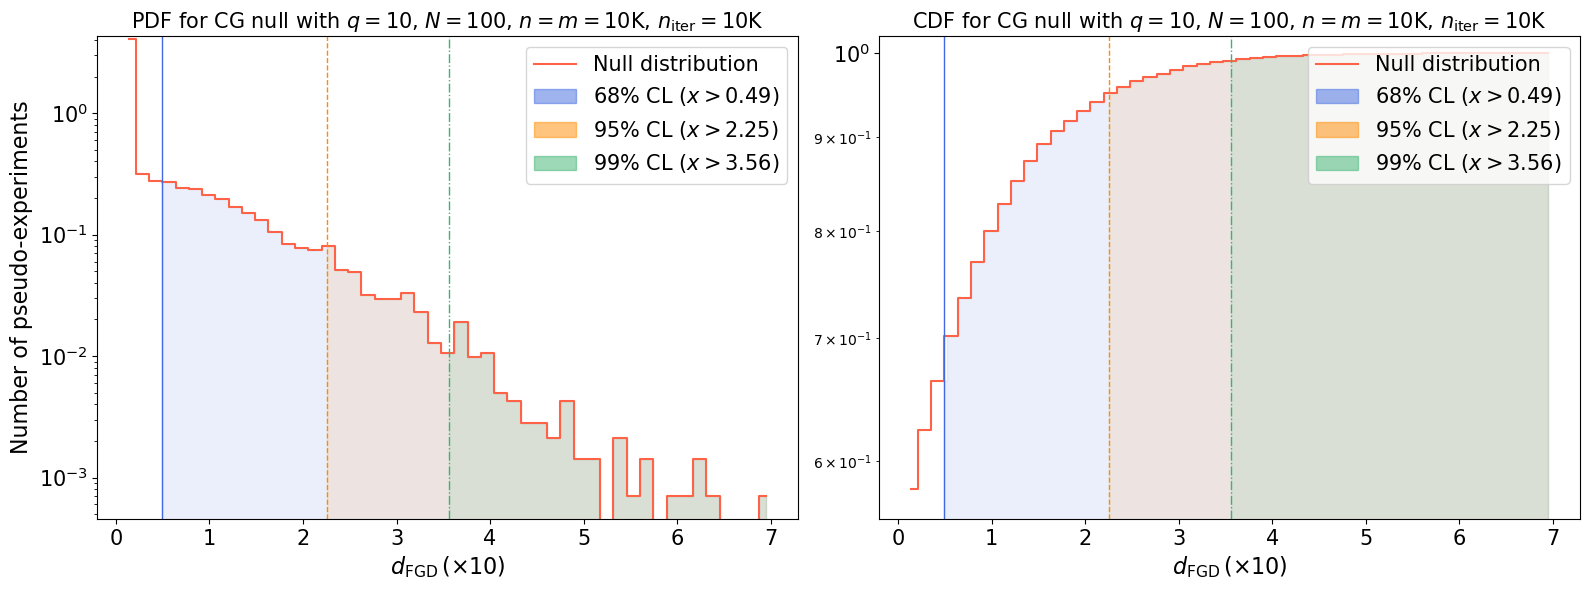

Time elapsed: 0.9633395001292229 seconds.
mu = 0.003618356205912751 +/- 0.003089298603446326
sigma = 0.5558145916981962 +/- 0.005132816970144329
68%CL = 0.18509017994219903, 95%CL = 1.033012613477331, 99%CL = 1.6422327854441392
mu = 0.003618356205912751 +/- 0.003089298603446326
sigma = 0.5558145916981962 +/- 0.005132816970144329


/tmp/ipykernel_3809254/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3809254/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3809254/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3809254/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


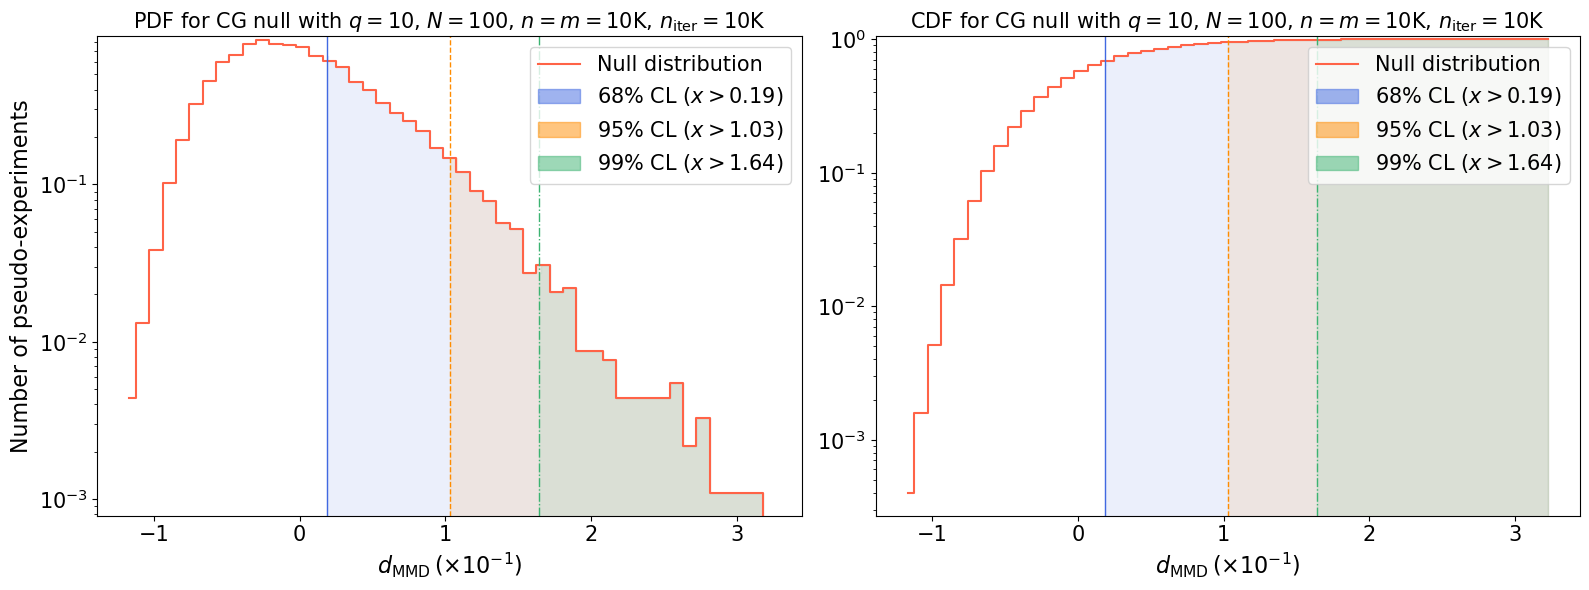

Time elapsed: 0.6004036297090352 seconds.
mu = 0.8648691346854616 +/- 5.299465978236321e-05
sigma = 0.07279743112388185 +/- 0.0005518238850025812
68%CL = 0.8933590126249226, 95%CL = 0.9968794671004748, 99%CL = 1.0584686620978003
mu = 0.8648691346854616 +/- 5.299465978236321e-05
sigma = 0.07279743112388185 +/- 0.0005518238850025812


/tmp/ipykernel_3809254/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3809254/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3809254/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3809254/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


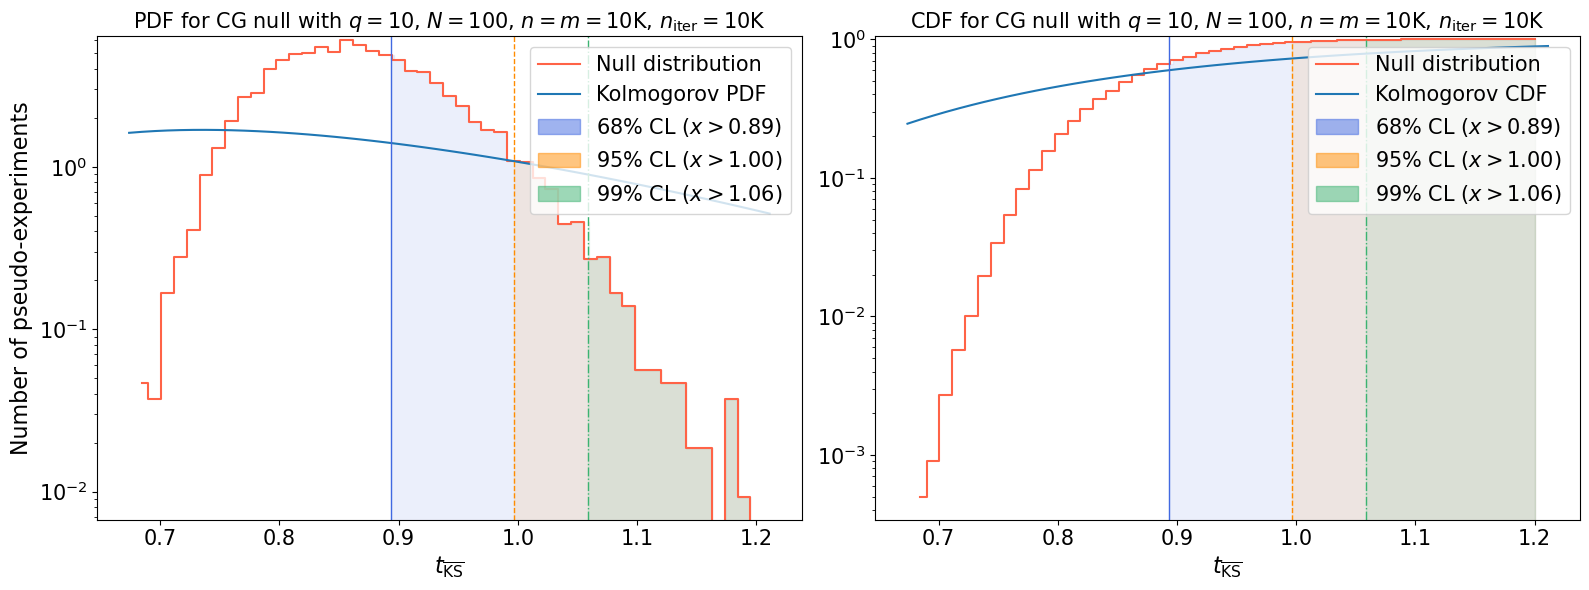

Time elapsed: 0.7724720151163638 seconds.
mu = 0.8644936473605142 +/- 5.260320444106967e-05
sigma = 0.07252806659567707 +/- 0.0005392963697586613
68%CL = 0.8937125957079707, 95%CL = 0.9940512028311513, 99%CL = 1.0572664048047808
mu = 0.8644936473605142 +/- 5.260320444106967e-05
sigma = 0.07252806659567707 +/- 0.0005392963697586613


/tmp/ipykernel_3809254/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3809254/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3809254/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3809254/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


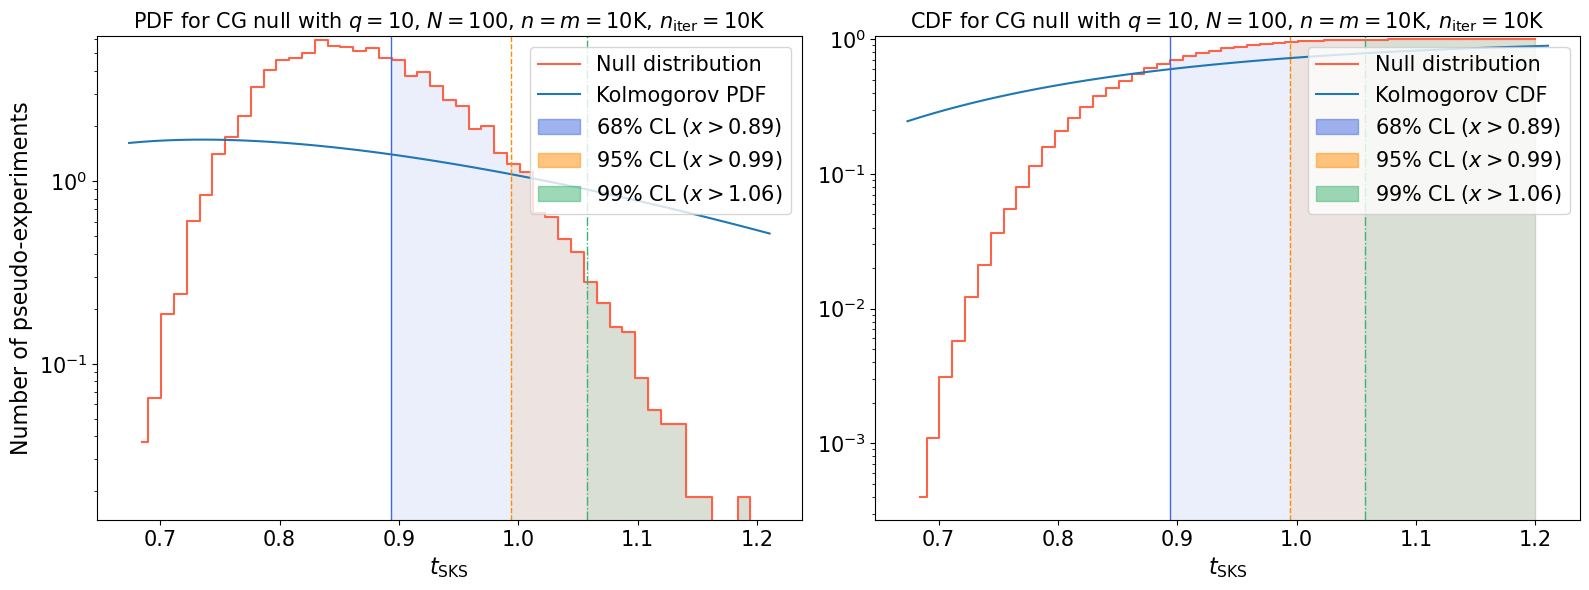

Time elapsed: 0.8010410061106086 seconds.
mu = 0.3668140891152895 +/- 1.7864397902474777e-05
sigma = 0.04226629615009432 +/- 0.0003416782606004182
68%CL = 0.3825686573545397, 95%CL = 0.4447215871002484, 99%CL = 0.4854803358811952
mu = 0.3668140891152895 +/- 1.7864397902474777e-05
sigma = 0.04226629615009432 +/- 0.0003416782606004182


/tmp/ipykernel_3809254/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3809254/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3809254/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3809254/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


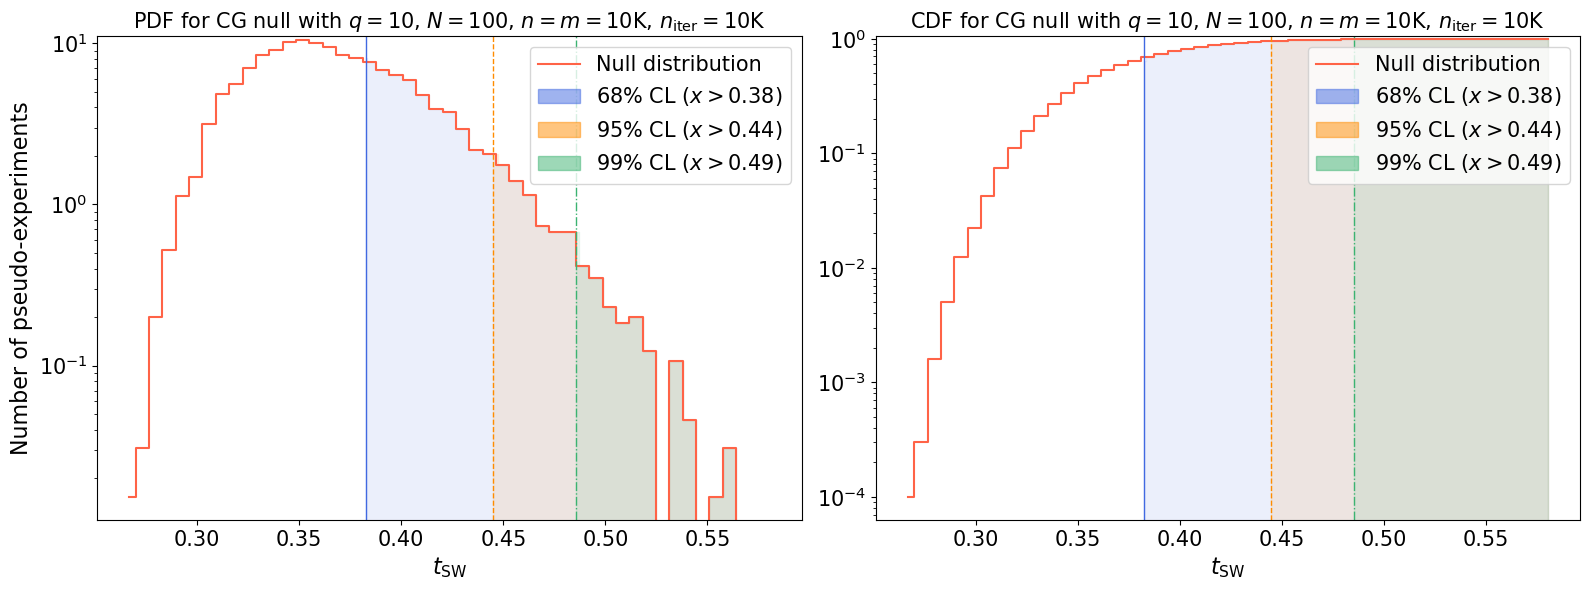

Time elapsed: 0.6313052610494196 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f5502601510>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 10000, 'ba...",100,$t_{\mathrm{FGD}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.048985230366114074], [...",results/100D_unimodal/100D_10K/null_hypothesis...
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f5502602e60>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2,$t_{\mathrm{MMD}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 1.8509017994219903], [0....",results/100D_unimodal/100D_10K/null_hypothesis...
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f5502602ef0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$t_{\overline{\mathrm{KS}}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.8933590126249226], [0....",results/100D_unimodal/100D_10K/null_hypothesis...
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5502602f80>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$t_{\mathrm{SKS}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.8937125957079707], [0....",results/100D_unimodal/100D_10K/null_hypothesis...
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5502603010>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$t_{\mathrm{SW}}$,results/100D_unimodal/100D_10K/null_hypothesis...,"[[0.68, [6800, 3199], 0.3825686573545397], [0....",results/100D_unimodal/100D_10K/null_hypothesis...
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f55026030a0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",100,$t_{\mathrm{LLR}}$,results/100D_unimodal/100D_10K/null_hypothesis...,[],NaN


In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    if "FGD" in latex:
        latex = r"$d_{\mathrm{FGD}}\,(\times 10)$"
        dist_null = dist_null * 10
    elif "MMD" in latex:
        latex = r"$d_{\mathrm{MMD}}\,(\times 10^{-1})$"
        dist_null = dist_null / 10
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for CG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        if "FGD" in latex:
            threshold_value = threshold_value * 10
        elif "MMD" in latex:
            threshold_value = threshold_value / 10
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for CG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        if "FGD" in latex:
            threshold_value = threshold_value * 10
        elif "MMD" in latex:
            threshold_value = threshold_value / 10
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [14]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [15]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        eps_max = 2.
        for bound in bounds:
            try:
                result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
            except:
                result = {}
            if result == {}:
                print(f"Computing {bound} bounds for {metric_config['name']} with {deformation} deformation.")
                result = compute_exclusion_bisection(dist_1,
                                                     metric_config = metric_config,
                                                     test_kwargs = test_kwargs,
                                                     model_dir = model_dir,
                                                     deformation = deformation,
                                                     seed_dist = 0,
                                                     x_tol = 0.01,
                                                     fn_tol = 0.05,
                                                     bound = bound,
                                                     eps_min = 0.,
                                                     eps_max = eps_max,
                                                     max_iterations = 50,
                                                     save = True,
                                                     filename = "exclusion_limits.json",
                                                     verbose = True)
                eps_max = list(result.values())[0]["exclusion_list"][-1][3]
            else:
                print(f"{bound.capitalize()} bounds for {metric_config['name']} with {deformation} deformation already loaded.")
            global_results.update(result)
print(global_results.keys())

Upper bounds for fgd with mean deformation already loaded.
Central bounds for fgd with mean deformation already loaded.
Lower bounds for fgd with mean deformation already loaded.
Upper bounds for fgd with cov_diag deformation already loaded.
Central bounds for fgd with cov_diag deformation already loaded.
Lower bounds for fgd with cov_diag deformation already loaded.
Upper bounds for fgd with cov_off_diag deformation already loaded.
Central bounds for fgd with cov_off_diag deformation already loaded.
Lower bounds for fgd with cov_off_diag deformation already loaded.
Upper bounds for fgd with power_abs_up deformation already loaded.
Central bounds for fgd with power_abs_up deformation already loaded.
Lower bounds for fgd with power_abs_up deformation already loaded.
Upper bounds for fgd with power_abs_down deformation already loaded.
Central bounds for fgd with power_abs_down deformation already loaded.
Lower bounds for fgd with power_abs_down deformation already loaded.
Upper bounds fo

### Likelihood-ratio test

In [16]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [17]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down"]
eps_max_def = []
bounds = ["upper", "central", "lower"]

for deformation in deformations:
    eps_max = 2.
    for bound in bounds:
        try:
            result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation and v["bound"] == bound}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for lr with {deformation} deformation.")
            result = compute_exclusion_LR_bisection(dist_1,
                                                    metric_config = metrics_config[unique_key]["lr"],
                                                    test_kwargs = test_kwargs,
                                                    model_dir = model_dir,
                                                    cl_list = [0.95, 0.99],
                                                    deformation = deformation,
                                                    seed_dist = 0,
                                                    x_tol = 0.01,
                                                    fn_tol = 0.05,
                                                    bound = bound,
                                                    eps_min = 0.,
                                                    eps_max = eps_max,
                                                    max_iterations = 50,
                                                    save = True,
                                                    filename = "exclusion_limits.json",
                                                    verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for lr with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Upper bounds for lr with mean deformation already loaded.
Central bounds for lr with mean deformation already loaded.
Lower bounds for lr with mean deformation already loaded.
Upper bounds for lr with cov_diag deformation already loaded.
Central bounds for lr with cov_diag deformation already loaded.
Lower bounds for lr with cov_diag deformation already loaded.
Upper bounds for lr with cov_off_diag deformation already loaded.
Central bounds for lr with cov_off_diag deformation already loaded.
Lower bounds for lr with cov_off_diag deformation already loaded.
Upper bounds for lr with power_abs_up deformation already loaded.
Central bounds for lr with power_abs_up deformation already loaded.
Lower bounds for lr with power_abs_up deformation already loaded.
Upper bounds for lr with power_abs_down deformation already loaded.
Central bounds for lr with power_abs_down deformation already loaded.
Lower bounds for lr with power_abs_down deformation already loaded.
dict_keys(['fgd_mean_upper_202

## Show and save results

In [18]:
import notebooks.shared as shared

In [19]:
results_df, times_df = shared.generate_result_dataframe(global_results, null_times)

Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
M

In [20]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
35,swd,$0.08359_{-0.034}^{+0.028}$,$0.10651_{-0.028}^{+0.025}$,$846$
9,ks,$0.08229_{-0.033}^{+0.027}$,$0.10339_{-0.028}^{+0.025}$,$653$
28,sks,$0.08589_{-0.037}^{+0.029}$,$0.10945_{-0.03}^{+0.026}$,$942$
2,fgd,$0.09233_{-0.033}^{+0.032}$,$0.11682_{-0.027}^{+0.029}$,$3410$
21,mmd,$0.05661_{-0.026}^{+0.03}$,$0.07172_{-0.024}^{+0.028}$,$1163$
16,lr,$0.00541_{-0.0032}^{+0.0033}$,$0.00768_{-0.0032}^{+0.0033}$,$2277$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
33,swd,$0.03133_{-0.014}^{+0.012}$,$0.03977_{-0.012}^{+0.011}$,$889$
7,ks,$0.03958_{-0.018}^{+0.015}$,$0.05039_{-0.016}^{+0.014}$,$689$
26,sks,$0.04009_{-0.019}^{+0.015}$,$0.05107_{-0.016}^{+0.014}$,$1027$
0,fgd,$0.02875_{-0.011}^{+0.01}$,$0.03664_{-0.0087}^{+0.0092}$,$3739$
19,mmd,$0.0369_{-0.016}^{+0.016}$,$0.04633_{-0.014}^{+0.015}$,$1257$
14,lr,$0.00101_{-0.00071}^{+0.00073}$,$0.0015_{-0.00071}^{+0.00073}$,$2566$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
34,swd,$0.03575_{-0.016}^{+0.011}$,$0.04688_{-0.013}^{+0.01}$,$16899$
8,ks,$1.04152_{-0.023}^{+0.017}$,$1.04671_{-0.011}^{+0.016}$,$12689$
27,sks,$0.04529_{-0.022}^{+0.017}$,$0.05937_{-0.018}^{+0.017}$,$17830$
1,fgd,$0.00356_{-0.0012}^{+0.00094}$,$0.0045_{-0.0009}^{+0.00081}$,$21078$
20,mmd,$0.02427_{-0.0085}^{+0.0086}$,$0.03006_{-0.0072}^{+0.0082}$,$15671$
15,lr,$0.01352_{-0.0063}^{+0.005}$,$0.01703_{-0.0049}^{+0.0047}$,$20116$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
37,swd,$0.00693_{-0.003}^{+0.0024}$,$0.0088_{-0.0024}^{+0.0022}$,$944$
11,ks,$0.00853_{-0.0035}^{+0.0028}$,$0.01068_{-0.0029}^{+0.0025}$,$878$
30,sks,$0.00784_{-0.0034}^{+0.0026}$,$0.00985_{-0.0026}^{+0.0024}$,$1109$
4,fgd,$0.00707_{-0.0025}^{+0.0025}$,$0.00898_{-0.0021}^{+0.0022}$,$4281$
23,mmd,$0.00447_{-0.0021}^{+0.0024}$,$0.00569_{-0.0019}^{+0.0022}$,$1027$
18,lr,$0.00038_{-0.0002}^{+0.00019}$,$0.00052_{-0.00019}^{+0.00019}$,$2640$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
36,swd,$0.00702_{-0.0032}^{+5}$,$0.00889_{-0.0026}^{+5}$,$863$
10,ks,$0.00823_{-0.0035}^{+0.0028}$,$0.01034_{-0.0029}^{+0.0025}$,$879$
29,sks,$0.00765_{-0.0036}^{+0.0027}$,$0.00961_{-0.0028}^{+0.0024}$,$1120$
3,fgd,$0.00686_{-0.0026}^{+0.0026}$,$0.00886_{-0.0023}^{+0.0023}$,$4380$
22,mmd,$0.00537_{-0.002}^{+0.0023}$,$0.00664_{-0.0018}^{+0.0022}$,$1039$
17,lr,$0.00033_{-0.0002}^{+0.00019}$,$0.00047_{-0.0002}^{+0.00019}$,$2712$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
38,swd,$0.4895_{-0.13}^{+0.084}$,$0.55438_{-0.087}^{+0.069}$,$761$
12,ks,$0.55303_{-0.14}^{+0.094}$,$0.6216_{-0.098}^{+0.083}$,$705$
31,sks,$0.53076_{-0.16}^{+0.092}$,$0.60111_{-0.1}^{+0.075}$,$898$
5,fgd,$0.23754_{-0.045}^{+0.029}$,$0.26842_{-0.03}^{+0.023}$,$3350$
24,mmd,$1.21562_{-0.25}^{+0.16}$,$1.35657_{-0.16}^{+0.13}$,$803$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
39,swd,$0.84895_{-0.22}^{+0.14}$,$0.96147_{-0.15}^{+0.12}$,$715$
13,ks,$0.95234_{-0.24}^{+0.17}$,$1.07042_{-0.17}^{+0.14}$,$680$
32,sks,$0.91554_{-0.25}^{+0.16}$,$1.04113_{-0.19}^{+0.13}$,$879$
6,fgd,$0.41168_{-0.076}^{+0.048}$,$0.4652_{-0.051}^{+0.039}$,$3227$
25,mmd,$2.08745_{-0.41}^{+0.3}$,$2.34223_{-0.27}^{+0.24}$,$747$


In [21]:
sorted_df_mean, sorted_df_cov_diag, sorted_df_cov_off_diag, sorted_df_power_abs_up, sorted_df_power_abs_down, sorted_df_random_normal, sorted_df_random_uniform = shared.get_sorted_dfs(results_df, show = True)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),95%CL,99%CL,time
16,lr,mean,100,10000,10000,$0.00541_{-0.0032}^{+0.0033}$,$0.00768_{-0.0032}^{+0.0033}$,$2277$,"[0.00218, 0.00541, 0.00867]","[0.00444, 0.00768, 0.01094]","[906.2338233010378, 657.2005175179802, 713.792..."
21,mmd,mean,100,10000,10000,$0.05661_{-0.026}^{+0.03}$,$0.07172_{-0.024}^{+0.028}$,$1163$,"[0.03012, 0.05661, 0.08667]","[0.04783, 0.07172, 0.0996]","[477.41207341314293, 345.3439138259273, 340.43..."
9,ks,mean,100,10000,10000,$0.08229_{-0.033}^{+0.027}$,$0.10339_{-0.028}^{+0.025}$,$653$,"[0.04907, 0.08229, 0.10956]","[0.07559, 0.10339, 0.12806]","[300.7131147729233, 168.82865931885317, 183.80..."
35,swd,mean,100,10000,10000,$0.08359_{-0.034}^{+0.028}$,$0.10651_{-0.028}^{+0.025}$,$846$,"[0.0493, 0.08359, 0.112]","[0.07813, 0.10651, 0.13169]","[390.59903794300044, 209.97930017096223, 245.7..."
28,sks,mean,100,10000,10000,$0.08589_{-0.037}^{+0.029}$,$0.10945_{-0.03}^{+0.026}$,$942$,"[0.04895, 0.08589, 0.11444]","[0.07991, 0.10945, 0.13531]","[427.5041638771072, 246.02560891886242, 268.86..."
2,fgd,mean,100,10000,10000,$0.09233_{-0.033}^{+0.032}$,$0.11682_{-0.027}^{+0.029}$,$3410$,"[0.05955, 0.09233, 0.12451]","[0.08953, 0.11682, 0.14546]","[1455.933051958913, 977.4528775659855, 976.927..."


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
16,lr,$0.00541_{-0.0032}^{+0.0033}$,$0.00768_{-0.0032}^{+0.0033}$,$2277$
21,mmd,$0.05661_{-0.026}^{+0.03}$,$0.07172_{-0.024}^{+0.028}$,$1163$
9,ks,$0.08229_{-0.033}^{+0.027}$,$0.10339_{-0.028}^{+0.025}$,$653$
35,swd,$0.08359_{-0.034}^{+0.028}$,$0.10651_{-0.028}^{+0.025}$,$846$
28,sks,$0.08589_{-0.037}^{+0.029}$,$0.10945_{-0.03}^{+0.026}$,$942$
2,fgd,$0.09233_{-0.033}^{+0.032}$,$0.11682_{-0.027}^{+0.029}$,$3410$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s),95%CL,99%CL,time
14,lr,cov_diag,100,10000,10000,$0.00101_{-0.00071}^{+0.00073}$,$0.0015_{-0.00071}^{+0.00073}$,$2566$,"[0.0003, 0.00101, 0.00174]","[0.00079, 0.0015, 0.00223]","[1127.5716922389693, 679.8385503250174, 758.93..."
0,fgd,cov_diag,100,10000,10000,$0.02875_{-0.011}^{+0.01}$,$0.03664_{-0.0087}^{+0.0092}$,$3739$,"[0.01825, 0.02875, 0.03894]","[0.02795, 0.03664, 0.04586]","[1648.2102782430593, 1013.8223962460179, 1077...."
33,swd,cov_diag,100,10000,10000,$0.03133_{-0.014}^{+0.012}$,$0.03977_{-0.012}^{+0.011}$,$889$,"[0.01701, 0.03133, 0.04288]","[0.02813, 0.03977, 0.05029]","[429.2470829419908, 226.91862295102328, 233.38..."
19,mmd,cov_diag,100,10000,10000,$0.0369_{-0.016}^{+0.016}$,$0.04633_{-0.014}^{+0.015}$,$1257$,"[0.0209, 0.0369, 0.05298]","[0.03272, 0.04633, 0.06153]","[536.6026319391094, 352.13583400589414, 368.68..."
7,ks,cov_diag,100,10000,10000,$0.03958_{-0.018}^{+0.015}$,$0.05039_{-0.016}^{+0.014}$,$689$,"[0.02136, 0.03958, 0.05478]","[0.03485, 0.05039, 0.06474]","[323.94519888213836, 181.93876812397502, 184.0..."
26,sks,cov_diag,100,10000,10000,$0.04009_{-0.019}^{+0.015}$,$0.05107_{-0.016}^{+0.014}$,$1027$,"[0.02105, 0.04009, 0.05539]","[0.03524, 0.05107, 0.06475]","[488.19498911802657, 261.74094638903625, 277.8..."


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
14,lr,$0.00101_{-0.00071}^{+0.00073}$,$0.0015_{-0.00071}^{+0.00073}$,$2566$
0,fgd,$0.02875_{-0.011}^{+0.01}$,$0.03664_{-0.0087}^{+0.0092}$,$3739$
33,swd,$0.03133_{-0.014}^{+0.012}$,$0.03977_{-0.012}^{+0.011}$,$889$
19,mmd,$0.0369_{-0.016}^{+0.016}$,$0.04633_{-0.014}^{+0.015}$,$1257$
7,ks,$0.03958_{-0.018}^{+0.015}$,$0.05039_{-0.016}^{+0.014}$,$689$
26,sks,$0.04009_{-0.019}^{+0.015}$,$0.05107_{-0.016}^{+0.014}$,$1027$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s),95%CL,99%CL,time
1,fgd,cov_off_diag,100,10000,10000,$0.00356_{-0.0012}^{+0.00094}$,$0.0045_{-0.0009}^{+0.00081}$,$21078$,"[0.0024, 0.00356, 0.0045]","[0.0036, 0.0045, 0.00531]","[11477.816731371451, 4799.401619764045, 4801.0..."
15,lr,cov_off_diag,100,10000,10000,$0.01352_{-0.0063}^{+0.005}$,$0.01703_{-0.0049}^{+0.0047}$,$20116$,"[0.00722, 0.01352, 0.01849]","[0.01209, 0.01703, 0.0217]","[10248.647313302383, 4706.9058130104095, 5161...."
20,mmd,cov_off_diag,100,10000,10000,$0.02427_{-0.0085}^{+0.0086}$,$0.03006_{-0.0072}^{+0.0082}$,$15671$,"[0.01579, 0.02427, 0.03284]","[0.02281, 0.03006, 0.03824]","[8625.362565166317, 3665.6925998181105, 3380.2..."
34,swd,cov_off_diag,100,10000,10000,$0.03575_{-0.016}^{+0.011}$,$0.04688_{-0.013}^{+0.01}$,$16899$,"[0.01969, 0.03575, 0.04724]","[0.03424, 0.04688, 0.05701]","[8447.588417317718, 4042.7953708339483, 4409.3..."
27,sks,cov_off_diag,100,10000,10000,$0.04529_{-0.022}^{+0.017}$,$0.05937_{-0.018}^{+0.017}$,$17830$,"[0.02377, 0.04529, 0.06226]","[0.04143, 0.05937, 0.07621]","[6286.487358297687, 7499.276469181292, 4045.12..."
8,ks,cov_off_diag,100,10000,10000,$1.04152_{-0.023}^{+0.017}$,$1.04671_{-0.011}^{+0.016}$,$12689$,"[1.01809, 1.04152, 1.05859]","[1.03598, 1.04671, 1.06227]","[5874.847346138209, 3250.828192457091, 3563.63..."


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,fgd,$0.00356_{-0.0012}^{+0.00094}$,$0.0045_{-0.0009}^{+0.00081}$,$21078$
15,lr,$0.01352_{-0.0063}^{+0.005}$,$0.01703_{-0.0049}^{+0.0047}$,$20116$
20,mmd,$0.02427_{-0.0085}^{+0.0086}$,$0.03006_{-0.0072}^{+0.0082}$,$15671$
34,swd,$0.03575_{-0.016}^{+0.011}$,$0.04688_{-0.013}^{+0.01}$,$16899$
27,sks,$0.04529_{-0.022}^{+0.017}$,$0.05937_{-0.018}^{+0.017}$,$17830$
8,ks,$1.04152_{-0.023}^{+0.017}$,$1.04671_{-0.011}^{+0.016}$,$12689$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s),95%CL,99%CL,time
18,lr,power_abs_up,100,10000,10000,$0.00038_{-0.0002}^{+0.00019}$,$0.00052_{-0.00019}^{+0.00019}$,$2640$,"[0.00018, 0.00038, 0.00057]","[0.00033, 0.00052, 0.00071]","[1275.4916935340152, 658.5092957460438, 706.10..."
23,mmd,power_abs_up,100,10000,10000,$0.00447_{-0.0021}^{+0.0024}$,$0.00569_{-0.0019}^{+0.0022}$,$1027$,"[0.00239, 0.00447, 0.00687]","[0.00377, 0.00569, 0.00793]","[498.250016113976, 255.07242768793367, 274.292..."
37,swd,power_abs_up,100,10000,10000,$0.00693_{-0.003}^{+0.0024}$,$0.0088_{-0.0024}^{+0.0022}$,$944$,"[0.00393, 0.00693, 0.00935]","[0.00639, 0.0088, 0.01098]","[484.81288739299634, 227.03160894697066, 233.0..."
4,fgd,power_abs_up,100,10000,10000,$0.00707_{-0.0025}^{+0.0025}$,$0.00898_{-0.0021}^{+0.0022}$,$4281$,"[0.00458, 0.00707, 0.00955]","[0.00688, 0.00898, 0.01121]","[2078.012258039089, 1106.5622984389775, 1097.2..."
30,sks,power_abs_up,100,10000,10000,$0.00784_{-0.0034}^{+0.0026}$,$0.00985_{-0.0026}^{+0.0024}$,$1109$,"[0.00444, 0.00784, 0.01041]","[0.00721, 0.00985, 0.0122]","[576.8589429079439, 256.1131117560435, 276.967..."
11,ks,power_abs_up,100,10000,10000,$0.00853_{-0.0035}^{+0.0028}$,$0.01068_{-0.0029}^{+0.0025}$,$878$,"[0.00507, 0.00853, 0.01133]","[0.00781, 0.01068, 0.01319]","[456.3694084279705, 204.26340936589986, 217.85..."


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
18,lr,$0.00038_{-0.0002}^{+0.00019}$,$0.00052_{-0.00019}^{+0.00019}$,$2640$
23,mmd,$0.00447_{-0.0021}^{+0.0024}$,$0.00569_{-0.0019}^{+0.0022}$,$1027$
37,swd,$0.00693_{-0.003}^{+0.0024}$,$0.0088_{-0.0024}^{+0.0022}$,$944$
4,fgd,$0.00707_{-0.0025}^{+0.0025}$,$0.00898_{-0.0021}^{+0.0022}$,$4281$
30,sks,$0.00784_{-0.0034}^{+0.0026}$,$0.00985_{-0.0026}^{+0.0024}$,$1109$
11,ks,$0.00853_{-0.0035}^{+0.0028}$,$0.01068_{-0.0029}^{+0.0025}$,$878$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s),95%CL,99%CL,time
17,lr,power_abs_down,100,10000,10000,$0.00033_{-0.0002}^{+0.00019}$,$0.00047_{-0.0002}^{+0.00019}$,$2712$,"[0.00013, 0.00033, 0.00052]","[0.00027, 0.00047, 0.00066]","[1278.6556116539869, 700.8748634669464, 732.47..."
22,mmd,power_abs_down,100,10000,10000,$0.00537_{-0.002}^{+0.0023}$,$0.00664_{-0.0018}^{+0.0022}$,$1039$,"[0.00334, 0.00537, 0.00766]","[0.0048, 0.00664, 0.00884]","[502.4875737610273, 261.0086055549327, 275.620..."
3,fgd,power_abs_down,100,10000,10000,$0.00686_{-0.0026}^{+0.0026}$,$0.00886_{-0.0023}^{+0.0023}$,$4380$,"[0.00428, 0.00686, 0.00949]","[0.00659, 0.00886, 0.01121]","[2099.986033203779, 1098.6936087380163, 1181.6..."
36,swd,power_abs_down,100,10000,10000,$0.00702_{-0.0032}^{+5}$,$0.00889_{-0.0026}^{+5}$,$863$,"[0.00384, 0.00702, 4.98047]","[0.00634, 0.00889, 4.99023]","[109.90921145002358, 506.70607249002205, 247.1..."
29,sks,power_abs_down,100,10000,10000,$0.00765_{-0.0036}^{+0.0027}$,$0.00961_{-0.0028}^{+0.0024}$,$1120$,"[0.00404, 0.00765, 0.01034]","[0.00684, 0.00961, 0.01205]","[569.212171815976, 265.67448159097694, 285.687..."
10,ks,power_abs_down,100,10000,10000,$0.00823_{-0.0035}^{+0.0028}$,$0.01034_{-0.0029}^{+0.0025}$,$879$,"[0.00471, 0.00823, 0.01102]","[0.00746, 0.01034, 0.01281]","[451.97463296097703, 211.15474900999106, 216.2..."


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
17,lr,$0.00033_{-0.0002}^{+0.00019}$,$0.00047_{-0.0002}^{+0.00019}$,$2712$
22,mmd,$0.00537_{-0.002}^{+0.0023}$,$0.00664_{-0.0018}^{+0.0022}$,$1039$
3,fgd,$0.00686_{-0.0026}^{+0.0026}$,$0.00886_{-0.0023}^{+0.0023}$,$4380$
36,swd,$0.00702_{-0.0032}^{+5}$,$0.00889_{-0.0026}^{+5}$,$863$
29,sks,$0.00765_{-0.0036}^{+0.0027}$,$0.00961_{-0.0028}^{+0.0024}$,$1120$
10,ks,$0.00823_{-0.0035}^{+0.0028}$,$0.01034_{-0.0029}^{+0.0025}$,$879$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s),95%CL,99%CL,time
5,fgd,random_normal,100,10000,10000,$0.23754_{-0.045}^{+0.029}$,$0.26842_{-0.03}^{+0.023}$,$3350$,"[0.1924, 0.23754, 0.2666]","[0.23872, 0.26842, 0.29095]","[1339.4100402030163, 956.5761927950662, 1054.5..."
38,swd,random_normal,100,10000,10000,$0.4895_{-0.13}^{+0.084}$,$0.55438_{-0.087}^{+0.069}$,$761$,"[0.3584, 0.4895, 0.57373]","[0.4671, 0.55438, 0.62344]","[312.6320618179743, 207.10178494104184, 241.87..."
31,sks,random_normal,100,10000,10000,$0.53076_{-0.16}^{+0.092}$,$0.60111_{-0.1}^{+0.075}$,$898$,"[0.37452, 0.53076, 0.62256]","[0.50021, 0.60111, 0.67599]","[376.5207768229884, 246.18876887200167, 275.76..."
12,ks,random_normal,100,10000,10000,$0.55303_{-0.14}^{+0.094}$,$0.6216_{-0.098}^{+0.083}$,$705$,"[0.41643, 0.55303, 0.64697]","[0.52382, 0.6216, 0.70436]","[306.7508611569647, 178.90160362096503, 220.15..."
24,mmd,random_normal,100,10000,10000,$1.21562_{-0.25}^{+0.16}$,$1.35657_{-0.16}^{+0.13}$,$803$,"[0.96709, 1.21562, 1.37207]","[1.20139, 1.35657, 1.48899]","[324.4219335629605, 214.9607777998317, 264.263..."


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,fgd,$0.23754_{-0.045}^{+0.029}$,$0.26842_{-0.03}^{+0.023}$,$3350$
38,swd,$0.4895_{-0.13}^{+0.084}$,$0.55438_{-0.087}^{+0.069}$,$761$
31,sks,$0.53076_{-0.16}^{+0.092}$,$0.60111_{-0.1}^{+0.075}$,$898$
12,ks,$0.55303_{-0.14}^{+0.094}$,$0.6216_{-0.098}^{+0.083}$,$705$
24,mmd,$1.21562_{-0.25}^{+0.16}$,$1.35657_{-0.16}^{+0.13}$,$803$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s),95%CL,99%CL,time
6,fgd,random_uniform,100,10000,10000,$0.41168_{-0.076}^{+0.048}$,$0.4652_{-0.051}^{+0.039}$,$3227$,"[0.33527, 0.41168, 0.45996]","[0.41445, 0.4652, 0.50426]","[1250.5601612010505, 956.8370368739124, 1020.3..."
39,swd,random_uniform,100,10000,10000,$0.84895_{-0.22}^{+0.14}$,$0.96147_{-0.15}^{+0.12}$,$715$,"[0.62533, 0.84895, 0.99121]","[0.80653, 0.96147, 1.08125]","[273.59354031900875, 219.50652738200733, 222.7..."
32,sks,random_uniform,100,10000,10000,$0.91554_{-0.25}^{+0.16}$,$1.04113_{-0.19}^{+0.13}$,$879$,"[0.66494, 0.91554, 1.0791]","[0.85598, 1.04113, 1.17483]","[346.936642775021, 253.01985338400118, 279.076..."
13,ks,random_uniform,100,10000,10000,$0.95234_{-0.24}^{+0.17}$,$1.07042_{-0.17}^{+0.14}$,$680$,"[0.7171, 0.95234, 1.11816]","[0.90204, 1.07042, 1.21294]","[272.3752919610124, 190.77689308999106, 216.99..."
25,mmd,random_uniform,100,10000,10000,$2.08745_{-0.41}^{+0.3}$,$2.34223_{-0.27}^{+0.24}$,$747$,"[1.67891, 2.08745, 2.3877]","[2.06757, 2.34223, 2.58158]","[281.43085690098815, 216.37068479787558, 250.1..."


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,fgd,$0.41168_{-0.076}^{+0.048}$,$0.4652_{-0.051}^{+0.039}$,$3227$
39,swd,$0.84895_{-0.22}^{+0.14}$,$0.96147_{-0.15}^{+0.12}$,$715$
32,sks,$0.91554_{-0.25}^{+0.16}$,$1.04113_{-0.19}^{+0.13}$,$879$
13,ks,$0.95234_{-0.24}^{+0.17}$,$1.07042_{-0.17}^{+0.14}$,$680$
25,mmd,$2.08745_{-0.41}^{+0.3}$,$2.34223_{-0.27}^{+0.24}$,$747$


### Latex

In [22]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex(results_df, times_df, title = "{\\bf CG model with $\\mathbf{d=100}$ and $\\mathbf{n=m=10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf CG model with $\mathbf{d=100}$ and $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.08359_{-0.034}^{+0.028}$ & $0.10651_{-0.028}^{+0.025}$ & $846$ & $0.03133_{-0.014}^{+0.012}$ & $0.03977_{-0.012}^{+0.011}$ & $889$ \\
	$t_{\overline{\mathrm{KS}}}$ & $0.08229_{-0.033}^{+0.027}$ & $0.10339_{-0.028}^{+0.025}$ & ${\mathbf{653}}$ & $0.03958_{-0.018}^{+0.015}$ & $0.05039_{-0.016}^{+0.014}$ & ${\mathbf{689}}$ \\
	$t_{\mathrm{SKS}}$ & $0.08589_{-0.037}^{+0.029}$ & $0.10945_{-0.03}^{+0.026}$ & $942$ & $0.04009_{-0.019}^{+0.015}$ & $0.05107_{-0.016}^{+0.014}$ & $1027$ \\
	$t_{\mathrm{FGD}}$ & $0.09233_{-0.033}^{+0.032}$ & $0.11682_{-0.027}^{+0.029

In [23]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/100D_unimodal/100D_10K/results_table.tex
